In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
# read CSV file into a pandas DataFrame

happiness_report = pd.read_csv('Resources/HappinessModelData.csv')
happiness_report.head()

,Unnamed: 0,Year,Country,HappyScore,GDP,SocialSupport,Health,Freedom,GovtTrust,Generosity
0,0,2015,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1,2015,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2,2015,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,3,2015,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,4,2015,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [3]:
happiness_report.describe()

,Unnamed: 0,Year,HappyScore,GDP,SocialSupport,Health,Freedom,GovtTrust,Generosity
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,77.778489,2016.992318,5.377232,0.914537,1.078780,0.612342,0.411254,0.125436,0.218618
std,45.162537,1.417814,1.127071,0.405403,0.329581,0.248459,0.152911,0.105816,0.122394
min,0.000000,2015.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,2016.000000,4.509000,0.605000,0.870210,0.440060,0.310480,0.054000,0.130000
50%,78.000000,2017.000000,5.321000,0.982000,1.125000,0.647239,0.431000,0.091000,0.202000
75%,117.000000,2018.000000,6.182000,1.233748,1.328000,0.808000,0.531000,0.156030,0.279060
max,157.000000,2019.000000,7.769000,1.870766,1.644000,1.141000,0.724000,0.551910,0.838075


In [4]:
#Assign the data to x and y

X = happiness_report[["GDP", "SocialSupport", "Health", "Freedom", "GovtTrust", "Generosity"]]
y = happiness_report["HappyScore"].values.reshape(-1,1)
print(X.shape, y.shape)

(781, 6) (781, 1)


In [5]:
#use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)

In [6]:
#Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7524568085005671
Testing Score: 0.7953204977917885


In [8]:
#score the model
score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.7634859769581235


Text(0.5, 1.0, 'Residual Plot')

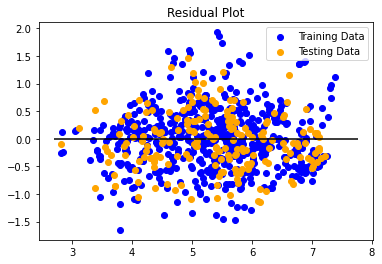

In [9]:
#Plot the Residuals for the Training and Testing Data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [10]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [11]:
Intercept = reg.intercept_
Coefficients = reg.coef_

In [12]:
Intercept

array([2.17506744])

In [13]:
Coefficients

array([[1.13599719, 0.64589619, 1.01271055, 1.48127094, 0.85822861,
        0.59244165]])

Linear Regression Model: 
y = 2.1751x + 1.12599x1 + 0.645896x2 + 1.0127x3 + 1.48127x4 + 0.858228x5 + 0.59244x6

Quartiles: 
GDP: 
min: 0
25%: 0.605
50%: 0.982
75%: 1.2337
max: 1.870766 

Social Support
min: 0
25%: .8702
50%: 1.125
75%: 1.328
max: 1.644

Health
min: 0
25%: .44006
50%: .647239
75%: .808
max: 1.141

Freedom
min: 0
25%: .31048
50%: .431
75%: .531
max: .724

GovtTrust
min: 0
25%: .054
50%: .091
75%: .156030
max: .55191

Genorosity
min: 0.0
25%: .13
50%: .202
75%: .279060
max: .838075

Overall Average Happiness Score: 5.377232

In [14]:
column = happiness_report["GDP"]
max_index = column.idxmax()
print(max_index)

349


In [15]:
#drop unnamed and year columns into new DF
happiness_report_df = happiness_report.drop(columns = ["Unnamed: 0", "Year"])
happiness_report_df

,Country,HappyScore,GDP,SocialSupport,Health,Freedom,GovtTrust,Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...
776,Rwanda,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700
777,Tanzania,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600
778,Afghanistan,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800
779,Central African Republic,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500


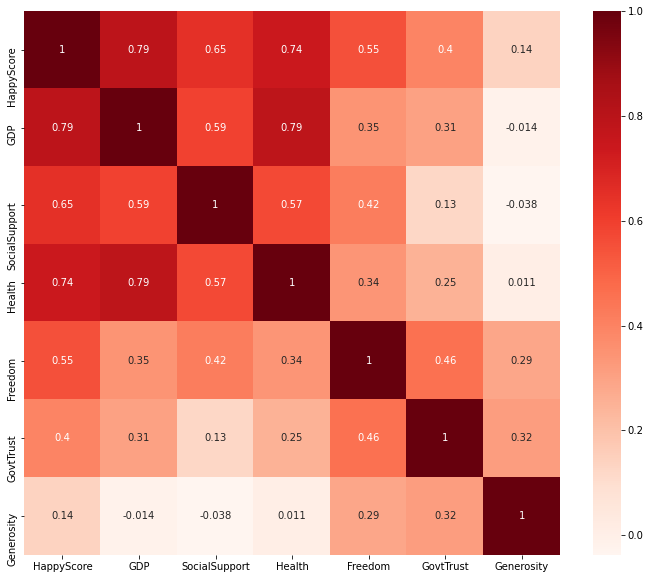

In [16]:
#Pearson Correlation
plt.figure(figsize= (12,10))
cor = happiness_report_df.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [17]:
#correlation with output variable
cor_target = abs(cor["HappyScore"])
cor_target

HappyScore       1.000000
GDP              0.789719
SocialSupport    0.651246
Health           0.742843
Freedom          0.553365
GovtTrust        0.398418
Generosity       0.138142
Name: HappyScore, dtype: float64

In [18]:
#chi-squared: does the data match expectations?
